# WHO : Life Expectancy Project

# Importing Libraries

In [ ]:
import os


import pandas as pd
#pd.set_option('display.max_column',None)
#pd.set_option('display.max_rows', None)

import warnings
warnings.filterwarnings('ignore')

import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import chi2, chi2_contingency
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import pearsonr


from sklearn.linear_model import Lasso, LassoCV, Ridge, RidgeCV
from sklearn.model_selection import cross_val_predict, train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error

import tensorflow as tf
from keras import Sequential
from keras.layers import Dense

In [ ]:
df = pd.read_csv('Life Expectancy Data.csv')
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


### Understanding The data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [ ]:
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [ ]:
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

### We can observe that there are many columns with null values hence we will have to treat those columns while EDA

In [ ]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

#### Will have to rename some columns due to Additional white spaces

# Things To Do For Making Data Workable

1. There are many columns with blank rows which dont have any values or are not detected as nulls.
2. Need to Treat the null values replacing them with medians.
3. Need to rename columns for easy of handeling while EDA.

### Replacing " " (blank spaces) with np.nan to consider them as Nulls.

In [ ]:
df.replace(' ', np.nan, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [ ]:
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


# Target Variable

### Life_expectancy

In [ ]:
df.rename(columns = {'Life expectancy ': 'Life_expectancy'}, inplace = True)

Treating Null Values

In [ ]:
df.Life_expectancy = df.Life_expectancy.fillna(df.Life_expectancy.median())

In [ ]:
df.Life_expectancy.isnull().sum()

0

<Axes: xlabel='Life_expectancy', ylabel='Density'>

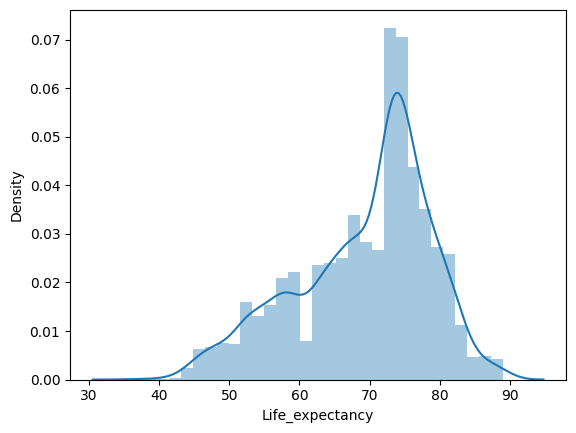

In [ ]:
sns.distplot(df.Life_expectancy)

# EDA : Exploratory Data Analysis

### 1. Country

In [ ]:
df.Country.isnull().sum()

0

#### Looking at the fact that name of country wont affect the Life Expectancy much Decided to eventually drop this column

### 2. Year

<Axes: xlabel='year', ylabel='Life_expectancy'>

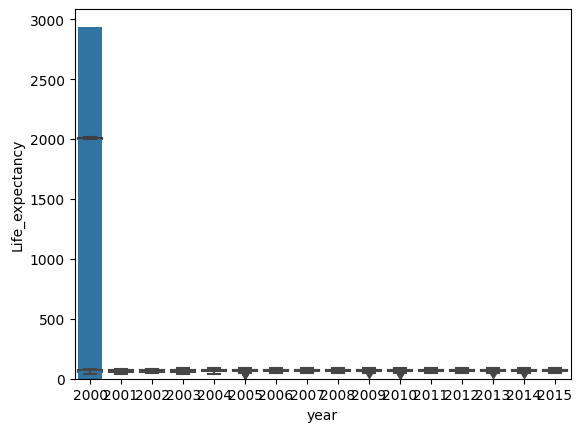

In [ ]:
df.rename(columns = {'Year':'year'}, inplace = True)
df.year
df.year.value_counts()
sns.countplot(df.year)
sns.boxplot(df.year)
sns.boxplot(y='Life_expectancy', x = 'year', data=df)

In [ ]:
df.rename(columns = {'Year':'year'}, inplace = True)

In [ ]:
df.year.isnull().sum()

0

<Axes: ylabel='count'>

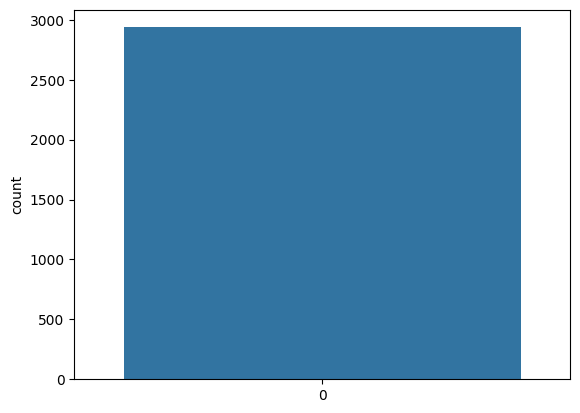

In [ ]:
sns.countplot(df.year)

<Axes: xlabel='year'>

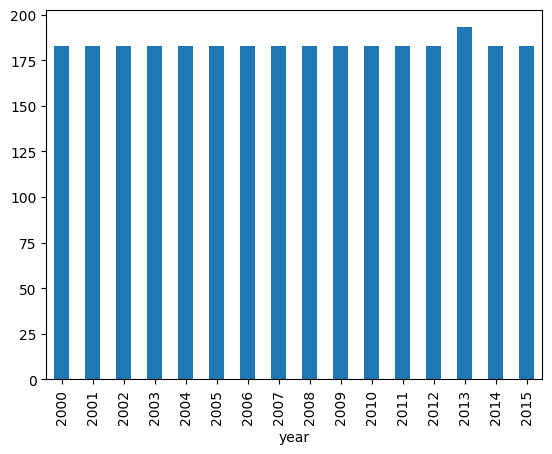

In [ ]:
df.groupby('year').count()['Life_expectancy'].plot(kind = 'bar')

In [ ]:
mod = ols('Life_expectancy ~ year', data=df).fit()
aov_table = sm.stats.anova_lm(mod)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
year,1.0,7749.218083,7749.218083,88.245126,1.124203e-20
Residual,2936.0,257823.920733,87.814687,NaN,NaN


P-value is Less than 0.05 Significance level hence there is a significant statistical difference between the Means of
Life Expectancy and Year

### 3. Status

In [ ]:
df.Status.value_counts()

Developing    2426
Developed      512
Name: Status, dtype: int64

In [ ]:
df.Status.isnull().sum()

0

Will replace this with numbers as SGD Regressor wont understand Category

<Axes: xlabel='Status'>

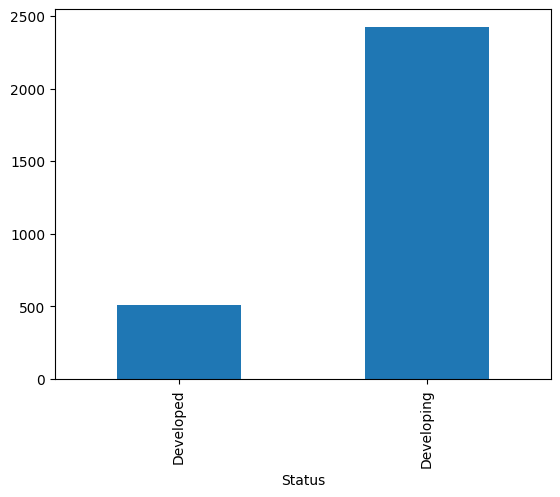

In [ ]:
df.groupby('Status').count()['Life_expectancy'].plot(kind = 'bar')

developing will be 1 and Developed will be 0
The category with more intance is taken as 1

In [ ]:
df.replace('Developing',1,inplace=True)

In [ ]:
df.replace('Developed',0,inplace=True)

In [ ]:
df.Status.value_counts()

1    2426
0     512
Name: Status, dtype: int64

In [ ]:
mod = ols('Life_expectancy ~ Status', data=df).fit()
aov_table = sm.stats.anova_lm(mod)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
Status,1.0,61549.269757,61549.269757,885.723111,2.479518e-170
Residual,2936.0,204023.869059,69.490419,NaN,NaN


As the p-value is less than 0.05 hence there is a significant statistical difference between Status and life Expectancy

### 4. Adult Mortality

In [ ]:
df.rename(columns = {'Adult Mortality':'adult_mortality'}, inplace = True)

In [ ]:
df.adult_mortality.isnull().sum()

10

In [ ]:
df.adult_mortality = df.adult_mortality.fillna(df.adult_mortality.median())

In [ ]:
df.adult_mortality.isnull().sum()

0

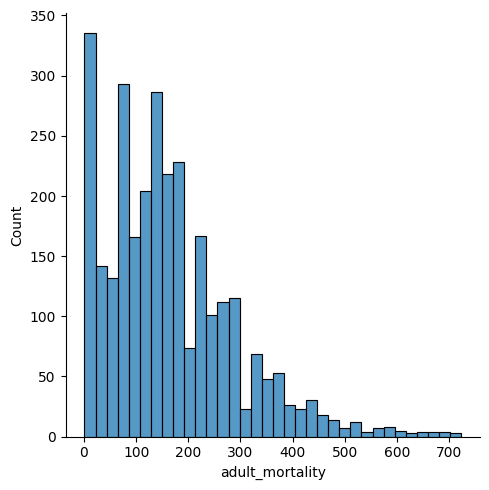

In [ ]:
sns.displot(df.adult_mortality)

In [ ]:
corr,_ = pearsonr(df.adult_mortality, df.Life_expectancy)
print('Pearsons Correlation: %.3f'%corr)

Pearsons Correlation: -0.696


Adult Mortality has a negative correlation with Life Expectancy.

### 5. Infant Death

In [ ]:
df.rename(columns = {'infant deaths':'infant_deaths'}, inplace=True)

In [ ]:
df.infant_deaths.isnull().sum()

0

<Axes: xlabel='infant_deaths', ylabel='Density'>

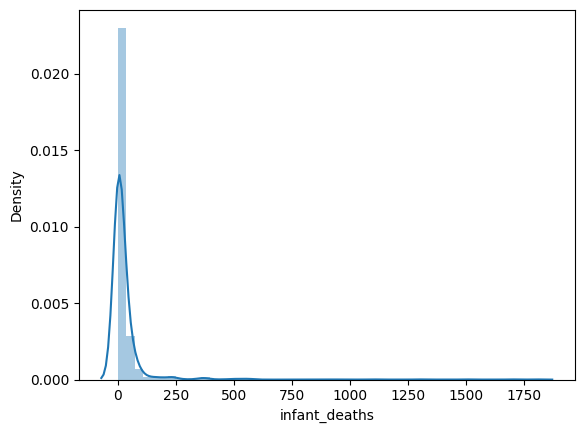

In [ ]:
sns.distplot(df.infant_deaths)

In [ ]:
corr,_ = pearsonr(df.infant_deaths ,df.Life_expectancy)
print('Pearsons correlation: %.3f' %corr)

Pearsons correlation: -0.197


### 6. Alcohol

In [ ]:
df.Alcohol.isnull().sum()

194

In [ ]:
df.Alcohol = df.Alcohol.fillna(df.Alcohol.median())

In [ ]:
df.Alcohol.isnull().sum()

0

<Axes: xlabel='Alcohol', ylabel='Density'>

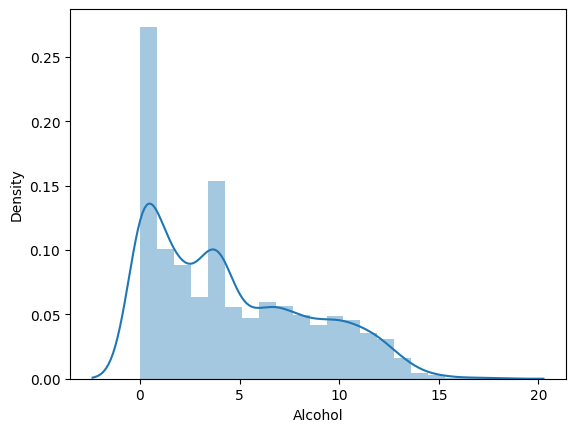

In [ ]:
sns.distplot(df.Alcohol)

In [ ]:
corr,_ = pearsonr(df.Alcohol, df.Life_expectancy)
print('Pearsons Correlation: %.3f'%corr)

Pearsons Correlation: 0.389


The correlation detween Alcohol and Life Expectancy

### 7. Percentage expenditure

In [ ]:
df.rename(columns = {'percentage expenditure':'percentage_expenditure'}, inplace=True)

In [ ]:
df.percentage_expenditure.isnull().sum()

0

<Axes: xlabel='percentage_expenditure', ylabel='Density'>

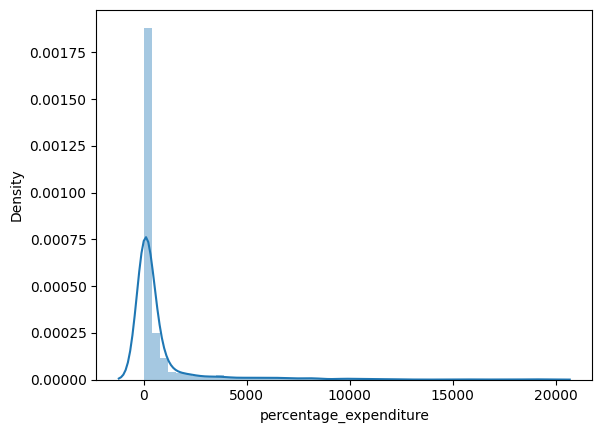

In [ ]:
sns.distplot(df.percentage_expenditure)

In [ ]:
corr,_ = pearsonr(df.percentage_expenditure, df.Life_expectancy)
print('Pearsons Correlation: %.3f'%corr)

Pearsons Correlation: 0.381


There is a positive correlation between Percentage Expenditure and Life Expectancy

### 8. Hepatitis B

In [ ]:
df.rename(columns = {'Hepatitis B':'hepatitis_b'}, inplace=True)

In [ ]:
df.hepatitis_b.isnull().sum()

553

In [ ]:
df['hepatitis_b'] = df['hepatitis_b'].fillna(df['hepatitis_b'].median())
df.hepatitis_b.isnull().sum()

0

<Axes: xlabel='hepatitis_b', ylabel='Density'>

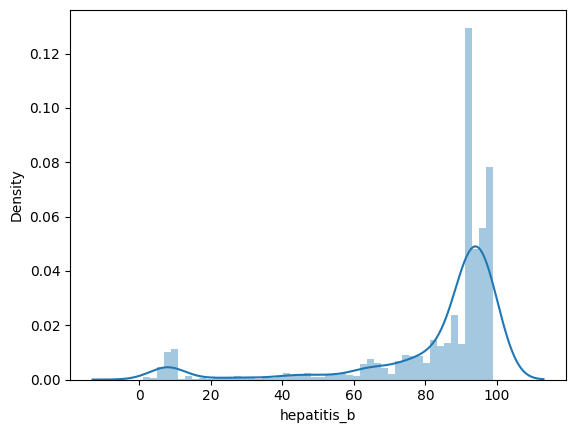

In [ ]:
sns.distplot(df.hepatitis_b)

In [ ]:
corr,_ = pearsonr(df.hepatitis_b, df.Life_expectancy)
print('Pearsons Correlation: %.3f'%corr)

Pearsons Correlation: 0.170


Positive correlation between Hepatitis b and Life expectancy

### 9. Measles

In [ ]:
df.rename(columns = {"Measles ":"Measles"}, inplace=True)

In [ ]:
df.Measles.isnull().sum()

0

<Axes: xlabel='Measles', ylabel='Density'>

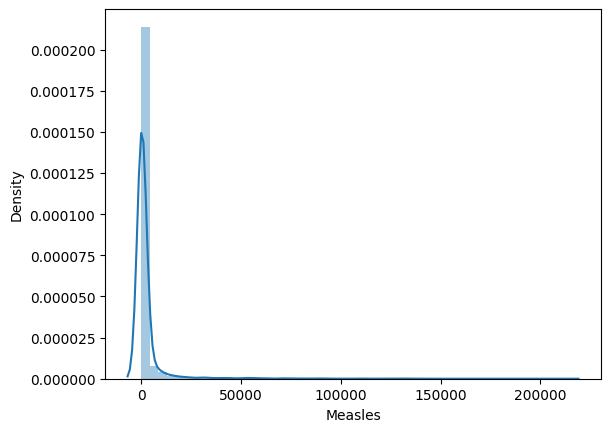

In [ ]:
sns.distplot(df.Measles)

In [ ]:
corr,_ = pearsonr(df.Measles, df.Life_expectancy)
print('Pearsons Correlation: %.3f'%corr)

Pearsons Correlation: -0.158


Negative Correlation between Measles and Life Expectancy

### 10. BMI

In [ ]:
df.rename(columns = {" BMI " :"bmi"}, inplace=True)

In [ ]:
df.bmi.isnull().sum()

34

In [ ]:
df['bmi'] = df['bmi'].fillna(df.bmi.median())
df.bmi.isnull().sum()

0

<Axes: xlabel='bmi', ylabel='Density'>

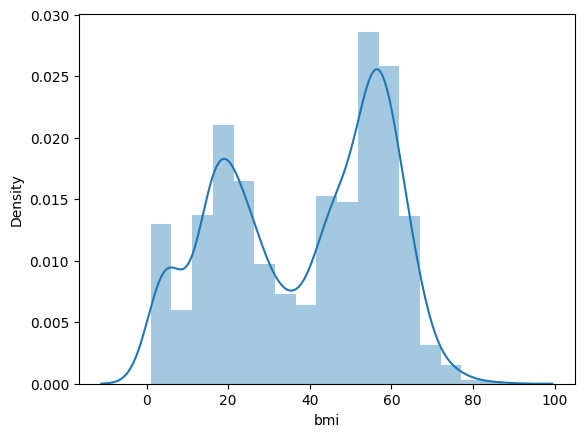

In [ ]:
sns.distplot(df.bmi)

In [ ]:
corr,_ = pearsonr(df.bmi ,df.Life_expectancy)
print('Pearsons correlation: %.3f' %corr)

Pearsons correlation: 0.557


Positive Correlation between BMI and Life Expectancy

### 11. under-five deaths

In [ ]:
df.rename(columns = { "under-five deaths ": "under_five_deaths"}, inplace = True)

In [ ]:
df.under_five_deaths.isnull().sum()

0

<Axes: xlabel='under_five_deaths', ylabel='Density'>

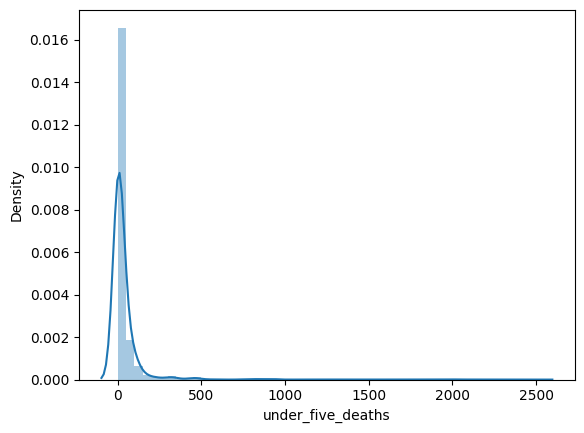

In [ ]:
sns.distplot(df.under_five_deaths)

In [ ]:
corr,_ = pearsonr(df.under_five_deaths ,df.Life_expectancy)
print('Pearsons correlation: %.3f' %corr)

Pearsons correlation: -0.223


Negative Correlation between Under five Deaths and Life expectancy

### 12. Polio

In [ ]:
df.Polio.isnull().sum()

19

In [ ]:
df.Polio = df.Polio.fillna(df.Polio.median())
df.Polio.isnull().sum()

0

<Axes: xlabel='Polio', ylabel='Density'>

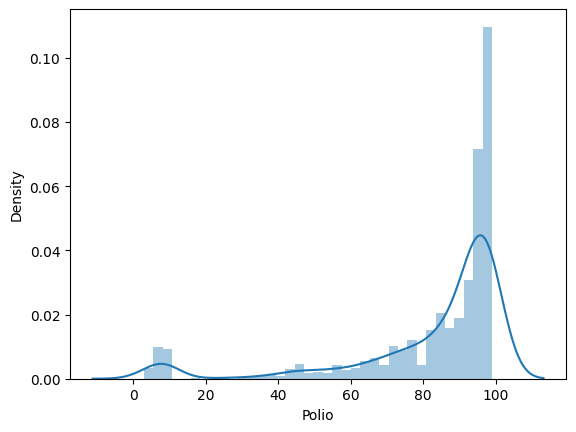

In [ ]:
sns.distplot(df.Polio)

In [ ]:
corr,_ = pearsonr(df.Polio ,df.Life_expectancy)
print('Pearsons correlation: %.3f' %corr)

Pearsons correlation: 0.458


Positive correlation between Polio and Life expectancy means If a person get affected by Polio his Life expectancy increases that means he will be more exposed to getting sick

### 13. Total expenditure

In [ ]:
df.rename(columns = {"Total expenditure":"total_expenditure"}, inplace = True)

In [ ]:
df.total_expenditure.isnull().sum()

226

In [ ]:
df.total_expenditure = df.total_expenditure.fillna(df.total_expenditure.median())
df.total_expenditure.isnull().sum()

0

<Axes: xlabel='total_expenditure', ylabel='Density'>

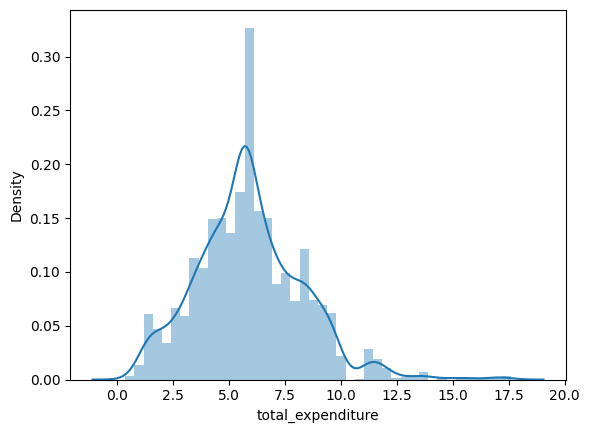

In [ ]:
sns.distplot(df.total_expenditure)

In [ ]:
corr,_ = pearsonr(df.total_expenditure, df.Life_expectancy)
print('Pearsons Correlation: %.3f'%corr)

Pearsons Correlation: 0.209


Postive Correlation between Total Expenditure and Life expectancy

### 14. Diptheria

In [ ]:
df.rename(columns = {"Diphtheria ": "diphtheria"}, inplace = True)

In [ ]:
df.diphtheria.isnull().sum()

19

In [ ]:
df.diphtheria = df.diphtheria.fillna(df.diphtheria.median())
df.diphtheria.isnull().sum()

0

<Axes: xlabel='diphtheria', ylabel='Density'>

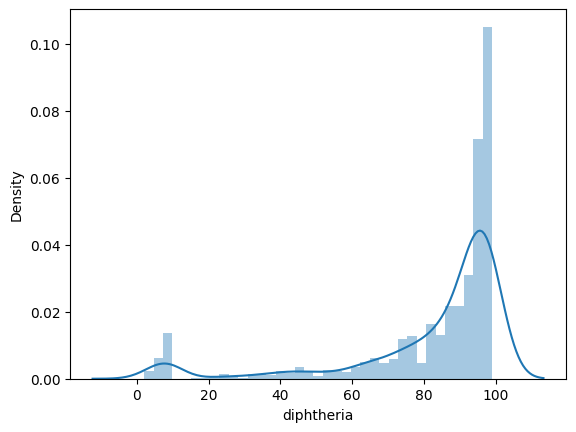

In [ ]:
sns.distplot(df.diphtheria)

In [ ]:
corr,_ = pearsonr(df.diphtheria, df.Life_expectancy)
print('Pearsons Correlation: %.3f'%corr)

Pearsons Correlation: 0.472


Positive correlation between Diphtheria and Life expectancy

### 15. HIV/AIDS

In [ ]:
df.rename(columns = {" HIV/AIDS":"hiv_aids"}, inplace = True)

In [ ]:
df.hiv_aids.isnull().sum()

0

<Axes: xlabel='hiv_aids', ylabel='Density'>

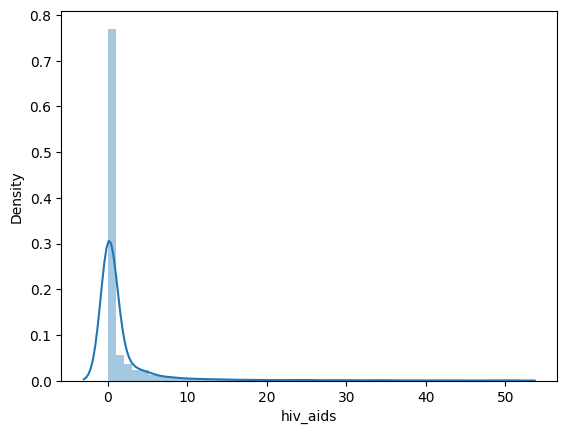

In [ ]:
sns.distplot(df.hiv_aids)

In [ ]:
corr,_ = pearsonr(df.hiv_aids, df.Life_expectancy)
print('Pearsons Correlation: %.3f'%corr)

Pearsons Correlation: -0.557


Negative Correlation between Hiv/Aids and Life Expectancy

### 16. GDP

In [ ]:
df.GDP.isnull().sum()

448

In [ ]:
df.GDP = df.GDP.fillna(df.GDP.median())
df.GDP.isnull().sum()

0

<Axes: xlabel='GDP', ylabel='Density'>

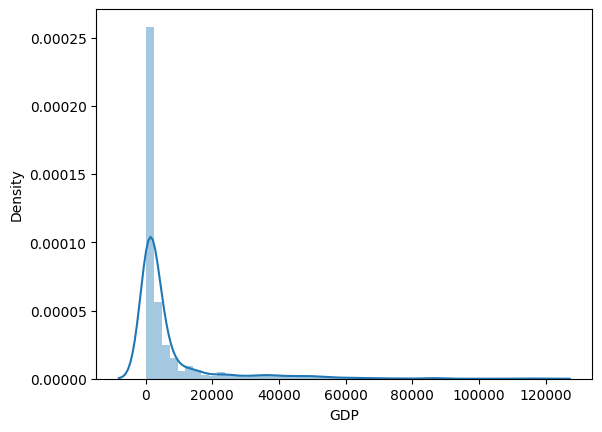

In [ ]:
sns.distplot(df.GDP)

In [ ]:
corr,_ = pearsonr(df.GDP, df.Life_expectancy)
print('Pearsons Correlation: %.3f'%corr)

Pearsons Correlation: 0.430


Positive Correlation between GDP and Life Expectancy

### 17. Population

In [ ]:
df.Population.isnull().sum()

652

In [ ]:
df.Population = df.Population.fillna(df.Population.median())
df.Population.isnull().sum()

0

<Axes: xlabel='Population', ylabel='Density'>

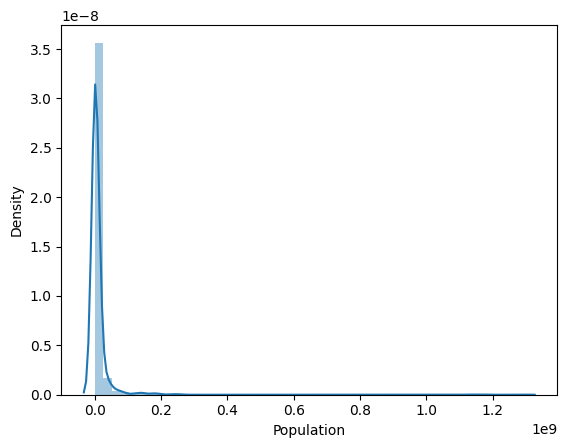

In [ ]:
sns.distplot(df.Population)

In [ ]:
corr,_ = pearsonr(df.Population, df.Life_expectancy)
print('Pearsons Correlation: %.3f'%corr)

Pearsons Correlation: -0.029


Negative Correlation between  Population and Life expectancy

### 18. thinness 1-19 years

In [ ]:
df.rename(columns = {" thinness  1-19 years":"thinness_1_19_years"}, inplace = True)

In [ ]:
df.thinness_1_19_years.isnull().sum()

34

In [ ]:
df.thinness_1_19_years = df.thinness_1_19_years.fillna(df.thinness_1_19_years.median())
df.thinness_1_19_years.isnull().sum()

0

<Axes: xlabel='thinness_1_19_years', ylabel='Density'>

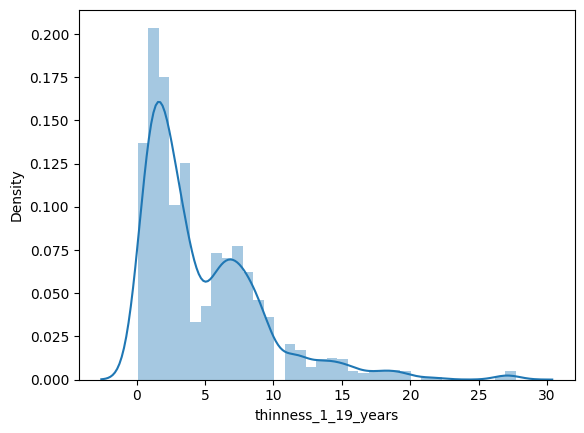

In [ ]:
sns.distplot(df.thinness_1_19_years)

In [ ]:
corr,_ = pearsonr(df.thinness_1_19_years, df.Life_expectancy)
print('Pearsons Correlation: %.3f'%corr)

Pearsons Correlation: -0.468


Negative Correlation between thinnes 1-19 and Life expectancy

### 19. Thinness 5-9 years

In [ ]:
df.rename(columns = {" thinness 5-9 years":"thinness_5_9_years"}, inplace = True)

In [ ]:
df.thinness_5_9_years.isnull().sum()

34

In [ ]:
df.thinness_5_9_years = df.thinness_5_9_years.fillna(df.thinness_5_9_years.median())
df.thinness_5_9_years.isnull().sum()

0

<Axes: xlabel='thinness_5_9_years', ylabel='Density'>

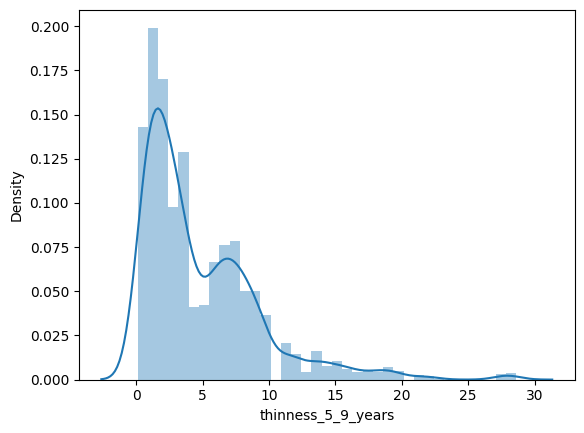

In [ ]:
sns.distplot(df.thinness_5_9_years)

In [ ]:
corr,_ = pearsonr(df.thinness_5_9_years, df.Life_expectancy)
print('Pearsons Correlation: %.3f'%corr)

Pearsons Correlation: -0.462


### 20. Income Composition Of resources

In [ ]:
df.rename(columns = {"Income composition of resources":"income_composition_of_resources"}, inplace= True)

In [ ]:
df.income_composition_of_resources.isnull().sum()

167

In [ ]:
df.income_composition_of_resources = df.income_composition_of_resources.fillna(df.income_composition_of_resources.median())
df.income_composition_of_resources.isnull().sum()

0

<Axes: xlabel='income_composition_of_resources', ylabel='Density'>

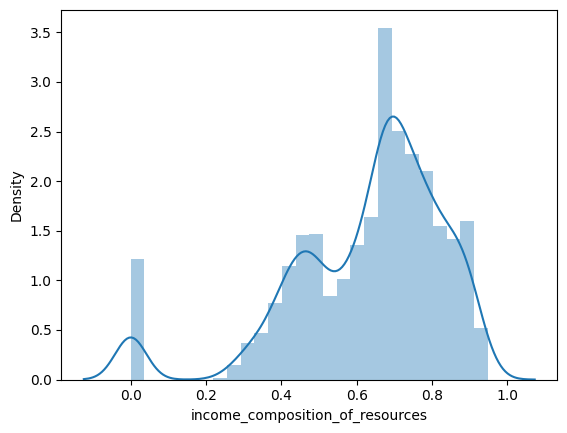

In [ ]:
sns.distplot(df.income_composition_of_resources)

In [ ]:
corr,_ = pearsonr(df.income_composition_of_resources, df.Life_expectancy)
print('Pearsons Correlation: %.3f'%corr)

Pearsons Correlation: 0.689


Positive correlation between imcome resource and life expectancy

### 21. Schooling

In [ ]:
df.Schooling.isnull().sum()

163

In [ ]:
df.Schooling = df.Schooling.fillna(df.Schooling.median())
df.Schooling.isnull().sum()

0

<Axes: xlabel='Schooling', ylabel='Density'>

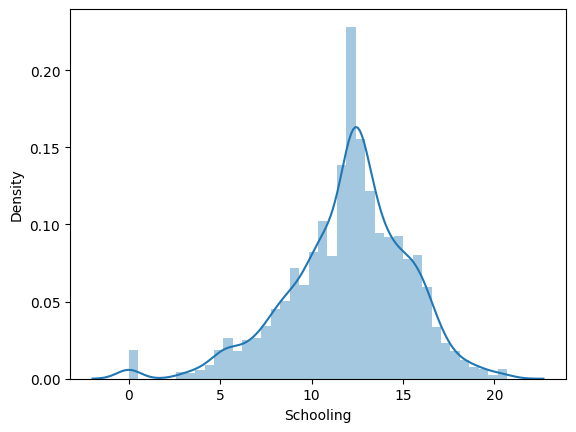

In [ ]:
sns.distplot(df.Schooling)

In [ ]:
corr,_ = pearsonr(df.Schooling, df.Life_expectancy)
print('Pearsons Correlation: %.3f'%corr)

Pearsons Correlation: 0.713


Positive Correlation between Schooling and Life expectancy

## Positive Correlation means Increase in the predictor value will also result in increase in the target variable

## Outliers are being neglectec as i made a model with outlier treatment and it failed to i learned that this is an accurate data and many countries can have a lot of things higher compared to others

# Model Building

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   year                             2938 non-null   int64  
 2   Status                           2938 non-null   int64  
 3   Life_expectancy                  2938 non-null   float64
 4   adult_mortality                  2938 non-null   float64
 5   infant_deaths                    2938 non-null   int64  
 6   Alcohol                          2938 non-null   float64
 7   percentage_expenditure           2938 non-null   float64
 8   hepatitis_b                      2938 non-null   float64
 9   Measles                          2938 non-null   int64  
 10  bmi                              2938 non-null   float64
 11  under_five_deaths                2938 non-null   int64  
 12  Polio               

In [ ]:
df.drop('Country', axis = 1, inplace = True)

# dropping country coz name of a country wont make any difference in the life expectancy

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   year                             2938 non-null   int64  
 1   Status                           2938 non-null   int64  
 2   Life_expectancy                  2938 non-null   float64
 3   adult_mortality                  2938 non-null   float64
 4   infant_deaths                    2938 non-null   int64  
 5   Alcohol                          2938 non-null   float64
 6   percentage_expenditure           2938 non-null   float64
 7   hepatitis_b                      2938 non-null   float64
 8   Measles                          2938 non-null   int64  
 9   bmi                              2938 non-null   float64
 10  under_five_deaths                2938 non-null   int64  
 11  Polio                            2938 non-null   float64
 12  total_expenditure   

As there is very high correlation in under_five_deaths and Infant deaths
As there is very high correlation in thinnes 5-9 and thinness 1-19
hence we will remove Under 5 and Thinnes 5-9

In [ ]:
df.drop(columns=['under_five_deaths','thinness_5_9_years'],axis =1, inplace=True)

In [ ]:
df.to_csv(r'D:\who_new.csv', index=False)

In [ ]:
x = df.loc[:, df.columns != 'Life_expectancy']
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 18 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   year                             2938 non-null   int64  
 1   Status                           2938 non-null   int64  
 2   adult_mortality                  2938 non-null   float64
 3   infant_deaths                    2938 non-null   int64  
 4   Alcohol                          2938 non-null   float64
 5   percentage_expenditure           2938 non-null   float64
 6   hepatitis_b                      2938 non-null   float64
 7   Measles                          2938 non-null   int64  
 8   bmi                              2938 non-null   float64
 9   Polio                            2938 non-null   float64
 10  total_expenditure                2938 non-null   float64
 11  diphtheria                       2938 non-null   float64
 12  hiv_aids            

In [ ]:
y = df.Life_expectancy
y.head()

0    65.0
1    59.9
2    59.9
3    59.5
4    59.2
Name: Life_expectancy, dtype: float64

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.20, random_state=0)

In [ ]:
sc_x = StandardScaler()
xtrain = sc_x.fit_transform(xtrain)
xtest = sc_x.transform(xtest)

In [ ]:
xtrain.shape

(2350, 18)

In [ ]:
xtest.shape

(588, 18)

In [ ]:
ytrain.shape

(2350,)

In [ ]:
ytest.shape

(588,)

In [ ]:
sgdr = SGDRegressor()
sgdr.fit(xtrain,ytrain)
score = sgdr.score(xtrain, ytrain)
print('R-Square: ', score)

R-Square:  0.8088716826337989


In [ ]:
y_pred = sgdr.predict(xtest)
mse = mean_squared_error(ytest, y_pred)
print('MSE: ', mse)
print('RMSE: ', np.sqrt(mse))

MSE:  17.116679005670772
RMSE:  4.1372308378516625


In [ ]:

plt.show()

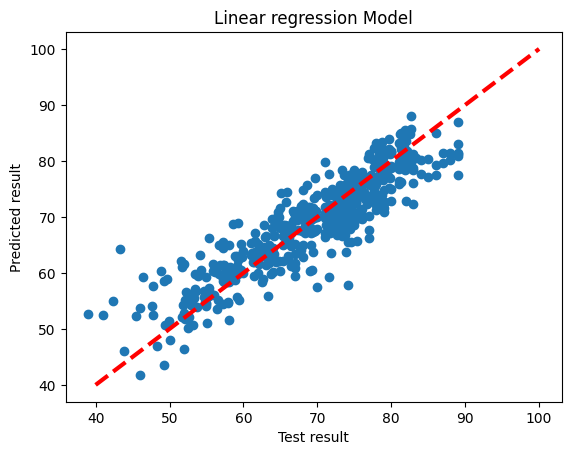

In [ ]:

x_ticks = [40,50,60,70,80,90,100]
y_ticks = [40,50,60,70,80,90,100]

xval = [40, 100]
yval = [40, 100]
plt.plot(xval,yval, 'r--',linewidth=3)
plt.scatter(ytest,y_pred)
plt.xticks(x_ticks)
plt.yticks(y_ticks)
plt.xlabel('Test result')
plt.ylabel('Predicted result')
plt.title("Linear regression Model")
plt.show()

## Implementing using Lasso and Ridge regression to improve Generalization

In [ ]:
from sklearn.linear_model import Lasso,Ridge
from sklearn.model_selection import GridSearchCV

model=Lasso()
alpha_value={'alpha':[1,0.1,0.01,0.001,0.0001]}

grid=GridSearchCV(estimator=model,param_grid=alpha_value)
grid.fit(x,y)

print(grid.best_score_)
print(grid.best_estimator_.alpha)
print(grid.best_params_)

0.7823322198180147
0.001
{'alpha': 0.001}


In [ ]:
ls=Lasso(alpha=0.01)

ls.fit(xtrain,ytrain)
print('Lasso score: ',ls.score(xtrain,ytrain))
lspred=ls.predict(xtest)
print('Mean Squared Error : ',mean_squared_error(ytest,lspred))
print('Root Mean squared Error : ',np.sqrt(mean_squared_error(ytest,lspred)))

Lasso score:  0.8097733899662822
Mean Squared Error :  17.169539671688096
Root Mean squared Error :  4.143614324679373


In [ ]:
model=Ridge()

alphavalue={'alpha':[1,0.1,0.01,0.001,0.0001]}

grid=GridSearchCV(estimator=model,param_grid=alphavalue)
grid.fit(x,y)

print(grid.best_score_)
print(grid.best_estimator_.alpha)
print(grid.best_params_)

0.7823659669524078
1
{'alpha': 1}


In [ ]:
rg=Ridge(alpha=1)

rg.fit(xtrain,ytrain)
print('Ridge Score: ',rg.score(xtrain,ytrain))
rgpred=rg.predict(xtest)
print('Mean Squared Error : ',mean_squared_error(ytest,rgpred))
print('Root Mean squared error: ',np.sqrt(mean_squared_error(ytest,rgpred)))


Ridge Score:  0.8097865529467189
Mean Squared Error :  17.18018411244336
Root Mean squared error:  4.144898564795447


### Coefficient Variance

In [ ]:
sgdr.coef_

array([-0.11159927, -0.64180397, -2.56157683, -0.17762747,  0.07417227,
        0.17242846, -0.54887433, -0.47741593,  1.01744382,  0.79585825,
        0.28392454,  1.12577225, -2.60236174,  0.56611774,  0.1497582 ,
       -0.29900824,  1.36619916,  2.01727813])

# Neural Networks

In [ ]:
model = Sequential([
    Dense(units = 10, activation = 'relu'),
    Dense(units = 1, activation = 'linear')
])

In [ ]:
from keras.losses import MeanSquaredError
model.compile(
    loss=MeanSquaredError(),
    optimizer=tf.keras.optimizers.Adam(0.01),
)

model.fit(
    xtrain,ytrain,
    epochs=150
)

Epoch 1/150
74/74 [==============================] - 1s 1ms/step - loss: 4114.2515
Epoch 2/150
74/74 [==============================] - 0s 1ms/step - loss: 1348.6409
Epoch 3/150
74/74 [==============================] - 0s 1ms/step - loss: 292.2517
Epoch 4/150
74/74 [==============================] - 0s 1ms/step - loss: 180.8872
Epoch 5/150
74/74 [==============================] - 0s 1ms/step - loss: 144.5640
Epoch 6/150
74/74 [==============================] - 0s 1ms/step - loss: 123.4306
Epoch 7/150
74/74 [==============================] - 0s 979us/step - loss: 105.6972
Epoch 8/150
74/74 [==============================] - 0s 1ms/step - loss: 91.6861
Epoch 9/150
74/74 [==============================] - 0s 1ms/step - loss: 77.6504
Epoch 10/150
74/74 [==============================] - 0s 988us/step - loss: 64.1603
Epoch 11/150
74/74 [==============================] - 0s 1ms/step - loss: 51.4137
Epoch 12/150
74/74 [==============================] - 0s 1ms/step - loss: 41.5550
Epoch 13/150

In [ ]:
mse = tf.keras.losses.MeanSquaredError()
print(mse)

In [ ]:
ypred = model.predict(xtest)

19/19 [==============================] - 0s 943us/step


In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(ytest,ypred)
print(r2)

0.8783313709638092


Text(0, 0.5, 'Accuracy')

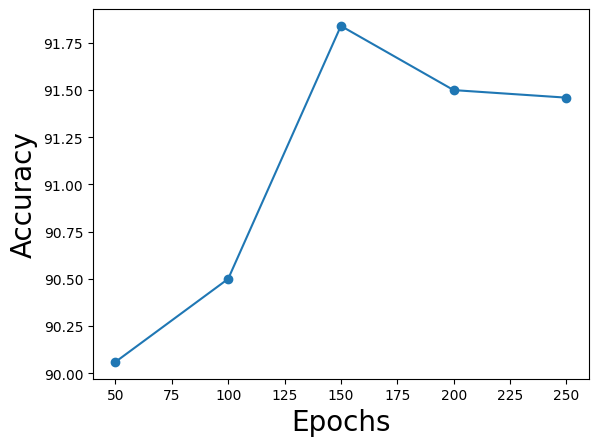

In [ ]:
epochs = [50,100,150,200,250]
accuracy = [90.06,90.50,91.84,91.5,91.46]
plt.plot(epochs,accuracy,marker='o')
plt.xlabel("Epochs",size = 20)
plt.ylabel("Accuracy",size = 20)